In [1]:
%run !EC2_mat.ipynb
%run !EC2_funcs.ipynb
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

Loading sheets in 0.4789 seconds


Materiaaleigenschappen:

In [2]:
f_ck = 45
g_c = 1.5

[f_cm,f_ctm, f_ctk, E_cm] = c_prop(f_ck)

f_cd = f_ck / g_c
E_cd = abs(f_cd / eps_c_el)

Kolomparameters:

In [3]:
b = 400 # [mm]
h = 800 # [mm]
A_c = b * h

as1 = 100 # [mm]
ys1 = as1 # [mm]
As1 = 2 * 201 # [mm2]

as2 = as1 # [mm]
ys2 = h - as2 # [mm]
As2 = As1 # [mm2]

#steps = 100
#size = h / steps

Beschrijving MN-capaciteitscurve (plastisch):

In [4]:
n = 20 # Nauwkeurigheid van de M-N-curve

# Plastische capaciteit
eps_1_s_el = eps_c_pl + h / (h - ys1) * (eps_s_el - eps_c_pl)
eps_1_s_pl = eps_c_pl + h / (h - ys1) * (eps_s_pl - eps_c_pl)
eps_2_s_el = eps_c_pl + h / ys2 * (eps_s_el - eps_c_pl)
eps_2_s_pl = eps_c_pl + h / ys2 * (eps_s_pl - eps_c_pl)

eps_1_stps = [eps_c_pl, 0, eps_1_s_el, eps_1_s_pl, eps_s_el, eps_c_pl, eps_c_pl, eps_c_pl, eps_c_pl]
eps_2_stps = [eps_c_pl, eps_c_pl, eps_c_pl, eps_c_pl, eps_s_el, eps_2_s_pl, eps_2_s_el, 0, eps_c_pl]

eps_1 = add_steps(n, eps_1_stps)
eps_2 = add_steps(n, eps_2_stps)

#eps_1, eps_2

In [5]:
N_Rd = []
e_M = []
M_Rd = []
kappa = []

for i in range(len(eps_1)):
    N_Rd = np.append(N_Rd, MN_ext(eps_1[i], eps_2[i])[0])
    e_M = np.append(e_M, MN_ext(eps_1[i], eps_2[i])[1])
    M_Rd = np.append(M_Rd, MN_ext(eps_1[i], eps_2[i])[2])
    kappa = np.append(kappa, MN_ext(eps_1[i], eps_2[i])[3])

Calculating capacity curve in 2.8856 seconds


Beschrijving MN-capaciteitscurve (elastisch):

In [6]:
n = 20 # Nauwkeurigheid van de M-N-curve

# Elastische capaciteit
eps_1_s_el = eps_c_el + h / (h - ys1) * (eps_s_el - eps_c_el)
eps_2_s_el = eps_c_el + h / ys2 * (eps_s_el - eps_c_el)

eps_1_stps = [eps_c_el, 0, eps_1_s_el, eps_s_el, eps_c_el, eps_c_el, eps_c_el]
eps_2_stps = [eps_c_el, eps_c_el, eps_c_el, eps_s_el, eps_2_s_el, 0, eps_c_el]

eps_1 = add_steps(n, eps_1_stps)
eps_2 = add_steps(n, eps_2_stps)

N_Rd_el = []
e_M_el = []
M_Rd_el = []
kappa_el = []

for i in range(len(eps_1)):
    N_Rd_el = np.append(N_Rd_el, MN_ext(eps_1[i], eps_2[i])[0])
    e_M_el = np.append(e_M_el, MN_ext(eps_1[i], eps_2[i])[1])
    M_Rd_el = np.append(M_Rd_el, MN_ext(eps_1[i], eps_2[i])[2])
    kappa_el = np.append(kappa_el, MN_ext(eps_1[i], eps_2[i])[3])

Bepalen maximale momentcapaciteit (plastisch & elastisch) <br />
bij gegeven axiale belasting:

In [7]:
N_Ed = -2750 # kN

M_sect_pl = find_roots(M_Rd, N_Rd - N_Ed)
M_sect_el = find_roots(M_Rd_el, N_Rd_el - N_Ed)

N_sect = np.array([1, len(M_sect_pl)])
N_sect.fill(N_Ed)

M_sect_pl[1], M_sect_el[1]

(877.6630528491798, 732.6233489740134)

In [8]:
n = 3  # Nauwkeurigheid van de M-kappa curve

M_arr = [0, M_sect_el[1], M_sect_pl[1]]
M_arr = add_steps(n, M_arr)

Bereken rekken voor N-M combinaties:<br />

In [9]:
e1_arr = []
e2_arr = []
for i in range(len(M_arr)):
    M_Ed = M_arr[i]
    e_N_guess = N_Ed * 10**3 / (E_cd * A_c)
    e_M_guess = M_Ed * 10**6 / (1/6 * b * h**2 * E_cd)
    e1_guess = e_N_guess - e_M_guess
    e2_guess = e_N_guess + e_M_guess
    #print(e1_guess, e2_guess)
        
    e1f, e2f = fsolve(equations, (e1_guess, e2_guess), xtol=10**-8)
    e1_arr = np.append(e1_arr, e1f)
    e2_arr = np.append(e2_arr, e2f)

Bereken snedekrachten & hoekverdraaiing voor rekcombinaties:

In [10]:
N_arr = []
e_arr = []
M_arr = []
kappa_arr = []
for i in range(len(e1_arr)):
    N, e, M, kappa = MN_ext(e1_arr[i],e2_arr[i])
    N, e, M = np.round((N, e, M),1)
    kappa = np.round((kappa),5)
    N_arr = np.append(N_arr, N)
    e_arr = np.append(e_arr, e)
    M_arr = np.append(M_arr, M)
    kappa_arr = np.append(kappa_arr, kappa)

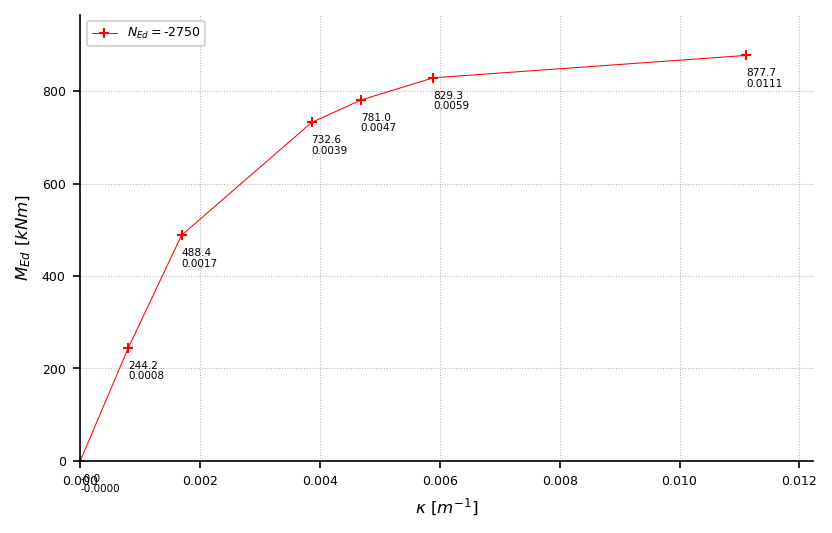

In [11]:
plotsize = (16/2.54,10/2.54) #afmeting in inches
plot_dpi = 150
font = {'weight' : 'normal',
        'size'   : 6}

plt.rc('font', **font)
fig1, ax1 = plt.subplots(figsize=plotsize, dpi=plot_dpi)

ax1.plot(kappa_arr, M_arr, color='r', linewidth=0.5, marker='+', ms=5, label='$N_{Ed} = $' + str(round(N_Ed,1)))

ax1.grid(True, which='both', linewidth=0.5, linestyle='dotted')
ax1.set_xlim([0,1.1*max(kappa_arr)])
ax1.set_ylim([0,1.1*max(M_arr)])
ax1.spines['left'].set_position('zero')
ax1.spines['right'].set_color('none')
ax1.spines['bottom'].set_position('zero')
ax1.spines['top'].set_color('none')

for x,y in zip(kappa_arr, M_arr):
    label1 = "{:.1f}".format(y)
    label2 = "{:.4f}".format(x)
    plt.annotate(label1, (x,y), textcoords="offset points", xytext=(0,-10), ha='left', fontsize=5)
    plt.annotate(label2, (x,y), textcoords="offset points", xytext=(0,-15), ha='left', fontsize=5)

plt.xlabel('$\kappa \ [m^{-1}]$', fontsize=8)
plt.ylabel('$M_{Ed} \ [kNm]$', fontsize=8)

plt.legend(loc = 'upper left')
plt.show()

In [12]:
import pandas as pd
df = pd.DataFrame([N_arr, M_arr, e1_arr, e2_arr, kappa_arr]).T
df.columns = ['N', 'M', 'e1', 'e2', 'kappa']

#dfp = df.pivot(index='$\\rho_1$ [%]',columns='d [mm]', values='$v_{Rdc}$ [MPa]')
df

,N,M,e1,e2,kappa
0,-2750.0,-0.0,-0.000487,-0.000487,-0.00000
1,-2750.0,244.2,-0.000805,-0.000169,0.00080
2,-2750.0,488.4,-0.001148,0.000204,0.00169
3,-2750.0,732.6,-0.001750,0.001341,0.00386
4,-2750.0,781.0,-0.001944,0.001802,0.00468
5,-2750.0,829.3,-0.002233,0.002475,0.00589
6,-2750.0,877.7,-0.003421,0.005466,0.01111


Test met bepalen MNKappa over range van de normaalkrachten:

In [13]:
m = 10 # Nauwkeurigheid van de uiteindelijke N-kappa_max curve

N_max = max(N_Rd)
N_min = min(N_Rd)
M_max = max(M_Rd)
i_M = np.where(M_Rd == M_max)[0]
N_M = N_Rd[i_M][0]
#print (N_max, M_max, i_M, N_M)

N_arr = np.round([0, N_M, 0.95 * N_min], 1) 
# In het bereik wordt de maximale normaalkracht vervangen door 98% van die waarde, omdat er anders geen
# bijbehorend moment gevonden kan worden

N_arr = np.round(add_steps(m, N_arr),1)
#N_arr

Bepalen van de maximale (plastische en elastische) momenten per normaalkracht:

In [14]:
M_sect_pl = []
M_sect_el = []

for i in range(len(N_arr)):
    N_Ed = N_arr[i]
    M = find_roots(M_Rd, N_Rd - N_Ed)
    M_sect_pl = np.append(M_sect_pl, max(M))
    M_el = find_roots(M_Rd_el, N_Rd_el - N_Ed)
    M_sect_el = np.append(M_sect_el, max(M_el))

#N_arr, M_sect_pl, M_sect_el

Bepalen van het M-Kappa diagram per normaalkracht:

In [15]:
tic = time.perf_counter()

M = []
k = []

for i in range(len(N_arr)):
    N_Ed = N_arr[i]
    M_arr = [0, M_sect_el[i], M_sect_pl[i]]
    
    # Aantal tussenstappen voor het M-Kappa diagram
    n = 2
    M_arr = add_steps(n, M_arr)
    
    k_arr = []
    for j in range(len(M_arr)):
        M_Ed = M_arr[j]
        # een rek guess waarde in de buurt van de uiteindelijke waarde
        # versnelt de berekening significant!
        e_N_guess = N_Ed * 10**3 / (E_cd * A_c)
        e_M_guess = M_Ed * 10**6 / (1/6 * b * h**2 * E_cd)
        e1_guess = e_N_guess + e_M_guess
        e2_guess = e_N_guess - e_M_guess
        #print(e1_guess, e2_guess)
        
        e1f, e2f = fsolve(equations, (e1_guess, e2_guess), xtol=10**-6)
        k_arr = np.append(k_arr, MN_ext(e1f, e2f)[3])

    if i==0:
        M = M_arr
        k = k_arr
    else:
        M = np.vstack((M, M_arr))
        k = np.vstack((k, k_arr))

toc = time.perf_counter()
print(f"Calculating multiple MNKappa in {toc - tic:0.4f} seconds")

G:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
G:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Calculating multiple MNKappa in 13.1636 seconds


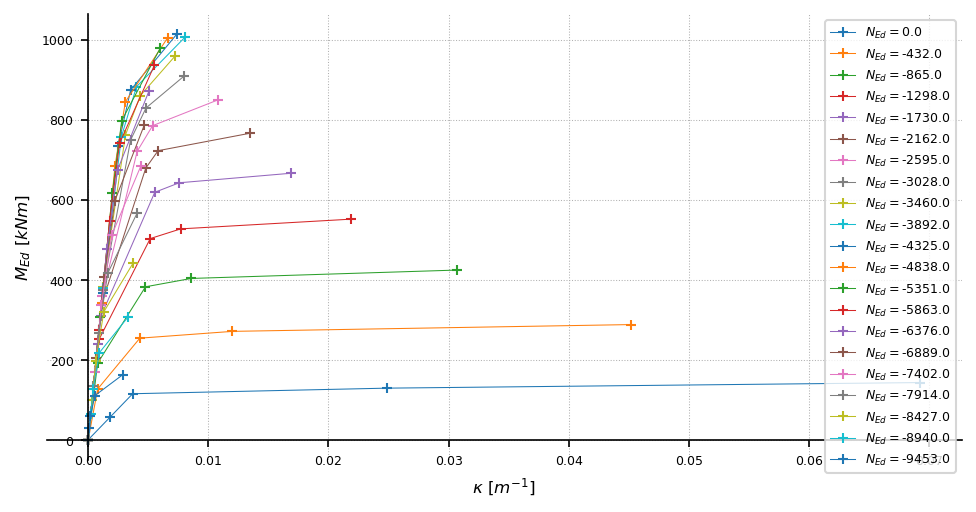

In [16]:
plotsize = (20/2.54,10/2.54) #afmeting in inches
fig1, ax1 = plt.subplots(figsize=plotsize, dpi=plot_dpi)

for i in range(len(N_arr)):
    ax1.plot(k[i], M[i], linewidth=0.5, marker="+", ms=5, label='$N_{Ed} = $' + str(round(N_arr[i],0)))

ax1.grid(True, which='both', linewidth=0.5, linestyle='dotted')
ax1.spines['left'].set_position('zero')
ax1.spines['right'].set_color('none')
ax1.spines['bottom'].set_position('zero')
ax1.spines['top'].set_color('none')

plt.xlabel('$\kappa \ [m^{-1}]$', fontsize=8)
plt.ylabel('$M_{Ed} \ [kNm]$', fontsize=8)

plt.legend(loc = 'upper right')
plt.show()

Bepalen van de maximale kromming (kappa) per normaalkracht:

In [17]:
nr_M = len(M[0])
k_max = []
M_max = []
for i in range(len(N_arr)):
    if i ==0:
        k_max = k[i, nr_M-1]
        M_max = M[i, nr_M-1]
    else:
        k_max = np.append(k_max, k[i, nr_M-1])
        M_max = np.append(M_max, M[i, nr_M-1])

#i, len(k_max), len(N_arr)

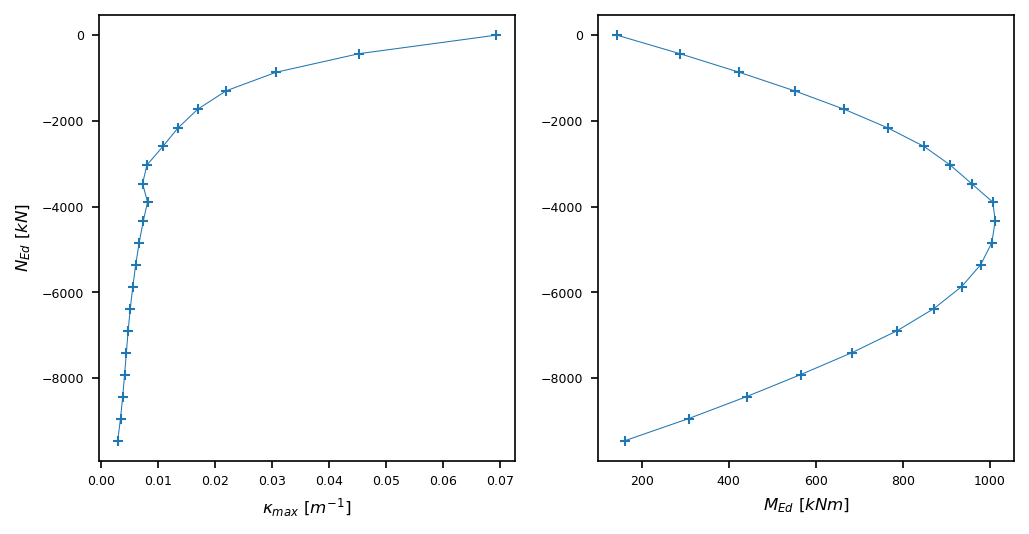

In [18]:
fig1, (ax1, ax2) = plt.subplots(1,2, figsize=plotsize, dpi=plot_dpi)

ax1.plot(k_max, N_arr, linewidth=0.5, marker="+", ms=5);
ax2.plot(M_max, N_arr, linewidth=0.5, marker="+", ms=5);

ax1.set_xlabel('$\kappa_{max} \ [m^{-1}]$', fontsize=8)
ax1.set_ylabel('$N_{Ed} \ [kN]$', fontsize=8)
ax2.set_xlabel('$M_{Ed} \ [kNm]$', fontsize=8)

plt.show()

In [19]:
df = pd.DataFrame([N_arr, np.round(N_arr/N_min * 100,1) , np.round(M_max, 1), k_max]).T
df.columns = ['$N_{Ed}$', '$\%N_{Rd}$', '$M_{u}$', '$k_{u}$']

df

,$N_{Ed}$,$\%N_{Rd}$,$M_{u}$,$k_{u}$
0,0.0,-0.0,142.9,0.069266
1,-432.5,4.3,287.9,0.045170
2,-865.0,8.7,424.1,0.030664
3,-1297.5,13.0,551.3,0.021884
4,-1730.0,17.4,666.0,0.016869
5,-2162.5,21.7,765.9,0.013443
6,-2595.0,26.1,849.1,0.010782
7,-3027.5,30.4,909.2,0.007994
8,-3460.0,34.8,958.3,0.007215
9,-3892.5,39.1,1007.1,0.008093


TESTING, TESTING